# ***Проект: Статистический анализ данных***

Вы аналитик популярного сервиса аренды самокатов **GoFast**. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.

***Сервисом можно пользоваться:*** \
**без подписки**\
абонентская плата отсутствует;\
стоимость одной минуты поездки — 8 рублей;\
стоимость старта (начала поездки) — 50 рублей;\
**с подпиской Ultra**\
абонентская плата — 199 рублей в месяц;\
стоимость одной минуты поездки — 6 рублей;\
стоимость старта — бесплатно.





**Цели исследования:** \
• проанализировать данные сервиса по аренде самокатов GoFast \
• проверить гипотезы, которые могут помочь бизнесу развиваться

**Ход исследования:**
1. Загрузка данных
   • Иморт всех данных из файлов:
         Пользователи — users_go.csv
         Поездки — rides_go.csv
         Подписки — subscriptions_go.csv
   • Ознакомления с ними, оценим количество пропусков и качество предоставленных данных
   
   
2. Предобработка данных


3. Исследовательский анализ данных: \
   • частоту встречаемости городов \
   • соотношение пользователей с подпиской и без \
   • средний возраст пользователей \
   • среднее расстояние, которое пользователь преодолел за одну поездку \
   • продолжительность поездок
   
   
4. Объединение данных и визуализация


5. Подсчет помесячной выручки


6. Проверка гипотез


7. Общий вывод


8. Допольнительное задание (Задачи)


In [ ]:
#Импортируем библиотеки которые нам пригодятся
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom
from math import factorial
import numpy as np


# Шаг 1. Загрузка данных

In [ ]:
#прочитаем данные
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

Изучим дадафрейм `users_go`, пострим есть ли пропущенные значения, а также количество уникальных пользователей

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None



,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


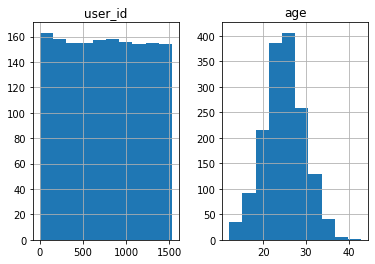

In [ ]:
#ознакомимся с дадафреймом 'user_go'
print(users_go.info())
print()
users_go.hist()
users_go.head(10)


In [ ]:
#выведем количество уникальных пользователей
users_go['user_id'].nunique()

1534

In [ ]:
#проверим столбец city на наличие неявных дубликатов
users_go['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

**Ознакомившись с данными дадафрейма 'users_go'можно сказать:**\
* имеет 5 столбцов и 1565 строк без пропусков и выбросов.
* столбцы имеют подходящий тип данных
* Названия столбцов соответствуют 'змеиному' стилю.
* Есть дубликаты  в столбце 'user_id'.(из 1565 с значений 1534 уникальны)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None

            user_id      distance      duration
count  18068.000000  18068.000000  18068.000000
mean     842.869936   3070.659976     17.805011
std      434.734317   1116.831209      6.091051
min        1.000000      0.855683      0.500000
25%      487.000000   2543.226360     13.597563
50%      889.000000   3133.609994     17.678395
75%     1213.250000   3776.222735     21.724800
max     1534.000000   7211.007745     40.823963


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


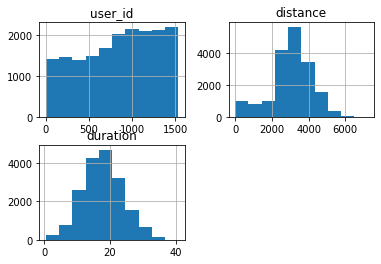

In [ ]:
#ознакомимся с дадафреймом 'rides_go'
print(rides_go.info())
print()
print(rides_go.describe())
rides_go.hist()
rides_go.head(10)

In [ ]:
#проверим количество уникальных пользователей в датафрейме 'rides_go'
rides_go['user_id'].nunique()

1534

**Ознакомившись с данными дадафрейма 'rides_go'можно сказать:**
* В датафрейме  4 столбца и 18068 строк без пропусков
* тип столбца 'date' следует изменить на *datetime*
* в датафреме 1534 уникальных пользователей
* возможно наличие выбросов в столбцах 'distance' и 'duration

In [ ]:
##ознакомимся с дадафреймом 'subscriptions_go'
print(subscriptions_go)
print()
subscriptions_go.info()

  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Ознакомившись с данными дадафрейма subscriptions_go', можно сказать:**
* в датафреме 2 строки и 4 столбца
* с типами данных все в порядке

**Вывод:**\
В целом по предоставленным данным можно сказать, что они довольно качествеенно выгружены, пропущенных значений не наблюдается,но есть возможные аномалии и строки дубликаты.\
Средний возраст пользователей примерно от 20 до 30 лет.\
Среденее время использование самоката - 17 минут, а расстояние которое в среднем проезжают пользователи от 2,5 до 3,8 км.

# Шаг 2. Предобработка данных

***2.1 Приведем столбец `date`  в датафрейме `riders_go` к нужному типу данных***

In [ ]:
#воспользуемся методом to_datetime
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

In [ ]:
#проверим что тип данных изменился
rides_go['date'].head()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

***2.2 Создадим новый столбец `month` с номером месяца в датафейм `rides_go`***

In [ ]:
#проверим за какой год предоставленны данные
rides_go['date'].dt.year.unique()

array([2021])

In [ ]:
#данные в датафрейме за 2021 год, можем добавить столбец
rides_go['month'] = rides_go['date'].dt.month
rides_go['month'].head()

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int64

***2.3 Обработаем дубликаты***

In [ ]:
print(f'Всего дубликатов: {users_go.duplicated().sum()}')

Всего дубликатов: 31


In [ ]:
#посмотрим на эти строки
users_go[users_go['user_id'].duplicated()]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [ ]:
#удалим дубликаты
users_go.drop_duplicates(inplace=True)

In [ ]:
#проверим что дубликаты удалены
print(f'Всего дубликатов: {users_go.duplicated().sum()}')

Всего дубликатов: 0


In [ ]:
#проверим датафрейм riders_go на наличие дубликатов
print(f'Всего дубликатов: {rides_go.duplicated().sum()}')

Всего дубликатов: 0


**Вывод:**
* Пропущенных значений нет, обнаруженные дубликаты в датафрейме `users_go` были удалены. \
* Добавили столбец с номером месяца(`month`) и изменили тип данных в столбце `date`

# Шаг 3. Исследовательский анализ данных
Опишем и визуализируем  общую информацию о пользователях и поездках

***3.1 Частота встречаемости городов***

In [ ]:
#посмотрим распределение пользователей по городам
count_by_city = users_go.pivot_table('user_id','city',aggfunc='count')
count_by_city= count_by_city.sort_values(by='user_id', ascending=False)
count_by_city



,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


In [ ]:
#добавим столбец 'ratio', чтобы посмотреть распределение пользователей в процентах
count_by_city['ratio'] = round((count_by_city/len(users_go))*100, 2)
count_by_city

,user_id,ratio
city,,
Пятигорск,219,14.28
Екатеринбург,204,13.30
Ростов-на-Дону,198,12.91
Краснодар,193,12.58
Сочи,189,12.32
Омск,183,11.93
Тюмень,180,11.73
Москва,168,10.95


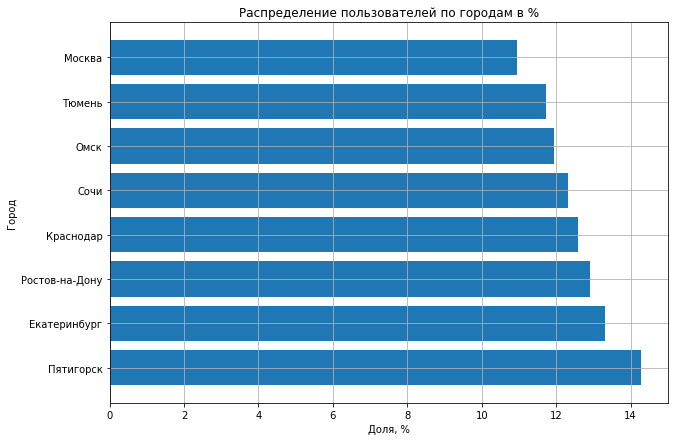

In [ ]:
plt.figure(figsize=(10, 7))
plt.barh(count_by_city.index, count_by_city['ratio'])
plt.title('Распределение пользователей по городам в %')
plt.xlabel('Доля, %')
plt.ylabel('Город')
plt.grid(True)
plt.show()

<div class="alert alert-info"> <b>Комментарии студента:</b> Вывела визуализацию распределения на столючатую диаграмму</div>

**Вывод**: \
Количество пользователей по городам распределяется практически равномерно

***3.2 Соотношение пользователей с подпиской и без***

In [ ]:
#посмотрим на количество пользователей с подпиской и без,а также доли от общего числа
count_subscription = users_go.pivot_table('user_id','subscription_type',aggfunc='count')
count_subscription['ratio'] = round((count_subscription/len(users_go))*100, 2)
count_subscription['ratio']= count_subscription['ratio'].apply(lambda x: f'{x:.2f}%')
count_subscription

,user_id,ratio
subscription_type,,
free,835,54.43%
ultra,699,45.57%


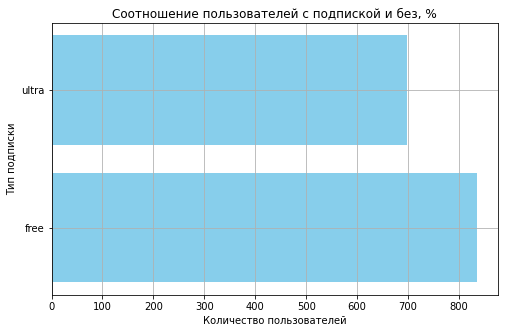

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(count_subscription.index, count_subscription['user_id'],color='skyblue')
plt.title('Соотношение пользователей с подпиской и без, %')
plt.xlabel('Количество пользователей')
plt.ylabel('Тип подписки')
plt.grid(True)
plt.show()

**Вывод:** \
Пользователей, которые используют бесплатную подписку `free` больше на 9%

***3.3 Возраст пользователей***

In [ ]:
#посмотрим описание данных методом describe
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

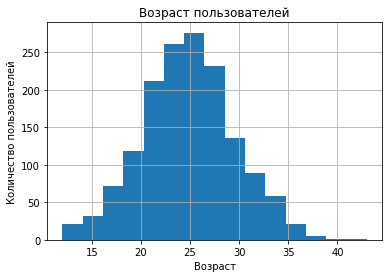

In [ ]:
#выведем данные на графике
plt.hist(users_go['age'], bins = 15)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

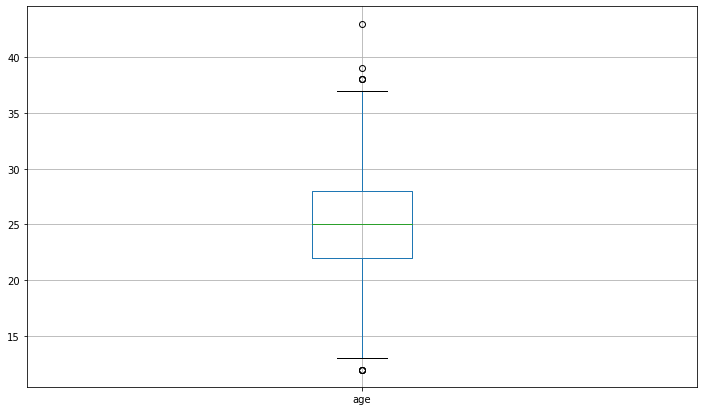

In [ ]:
#построим диаграмму размаха
users_go.boxplot(column='age', figsize=(12, 7));

In [ ]:
qr1 = users_go['age'].quantile(.25) # первый квартиль
qr3 = users_go['age'].quantile(.75) # третий квартиль
iqr = qr3 - qr1 #межквартильный размах

qr_low = round((qr1 - 1.5 * iqr),2)
qr_high = round((qr3 + 1.5 * iqr),2)

print('Выбросы минимального значения возраста пользователей - ',qr_low)
print('Выбросы максимального значения возраста пользователей - ',qr_high)


Выбросы минимального значения возраста пользователей -  13.0
Выбросы максимального значения возраста пользователей -  37.0


In [ ]:
print('Количество пользователей за пределами минимального возраста - ',
      users_go.query('age < 13.0').value_counts().sum())
print('Количество пользователей за пределами максильного возраста - ',
       users_go.query('age > 37.0').value_counts().sum())

Количество пользователей за пределами минимального возраста -  4
Количество пользователей за пределами максильного возраста -  5


*На гистограмме визуально видно, чтов среднем самокатами пользуются люди в возрасте от 21 до 28 лет*\
По диаграмме размаха можно сказать, что выбросами считаются пользовадели до 13 лет и старше 37. Поскольку таких пользователей у нас всего 9 человек и данные вполне реальны, мы оставим их без изменений.

In [ ]:
users_go['age'].value_counts()

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

In [ ]:
#количество пользователей моложе 18 лет и старше 31 года в процентах
rides_go_yang= round(((users_go.query('age< 18').count()/len(users_go))*100),2)
rides_go_adult_plus = round(((users_go.query('age> 31').count()/len(users_go))*100),2)
print(rides_go_yang['user_id'])
print(rides_go_adult_plus['user_id'])


5.15
8.28


***3.4 Расстояние, которое пользователь преодолел за одну поездку***

In [ ]:
#посмотрим описание данных столбца 'distance'
print(rides_go['distance'].describe())

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


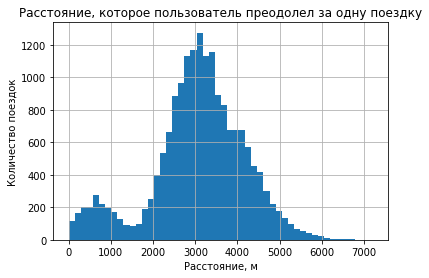

In [ ]:
#построим гистограмму
plt.hist(rides_go['distance'], bins = 50)
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

по данным видим, что в среднем расстояние, которое проезжают пользователи находится в диапозоне от 2.5 до 4 км

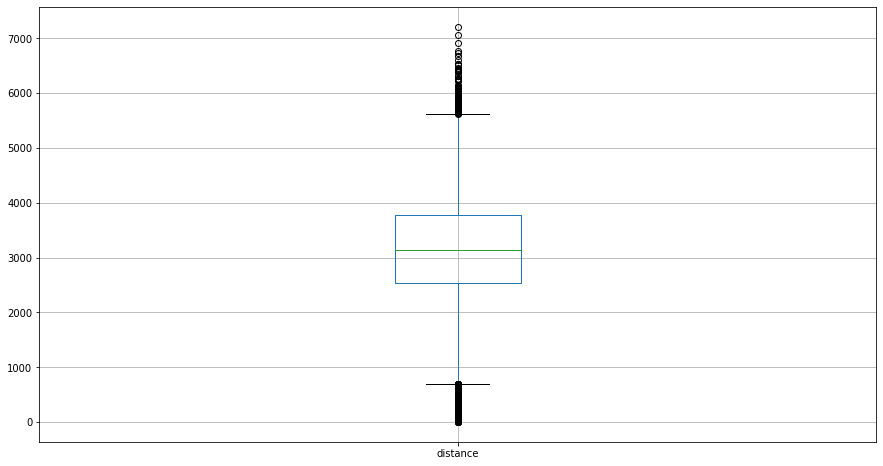

In [ ]:
rides_go.boxplot(column='distance', figsize=(15, 8));

In [ ]:
#посомтрим какие значения мы можем считать выбросами
#рассчитаем точное значение верхнего  и нижнего уса диаграммы размаха
qr1 = rides_go['distance'].quantile(.25) # первый квартиль
qr3 = rides_go['distance'].quantile(.75) # третий квартиль
iqr = qr3 - qr1 #межквартильный размах

qr_low = round((qr1 - 1.5 * iqr),2)
qr_high = round((qr3 + 1.5 * iqr),2)

print('Выбросы минимального значения расстоянияв метрах - ',qr_low)
print('Выбросы максимального значения расстоянияв метрах - ',qr_high)


Выбросы минимального значения расстоянияв метрах -  693.73
Выбросы максимального значения расстоянияв метрах -  5625.72


In [ ]:
print('Количество поездок за пределами минимально нормального расстояния - ',
      rides_go.query('distance < 693.73').value_counts().sum())
print('Количество поездок за пределами максимально нормального расстояния - ',
      rides_go.query('distance > 5625.72').value_counts().sum())

Количество поездок за пределами минимально нормального расстояния -  910
Количество поездок за пределами максимально нормального расстояния -  126


Всего в датафрейме `rides_go` у нас 18068 строк, из них аномально маленьких и больших  5% (1036 строк)
В другой ситуации мы могли бы посчитать это выбросами и удалить, но рассматривая такие аномалии в рамках аренды самоката, данные могут показаться вполне реальными. \
Пользователь вполне мог проехать минимальное расстояние, взяв самокат в аренду и передумав, или довольно большое расстояние (в 7 км) , если заряда самоката хватило

***3.5 Продолжительность поездок***

In [ ]:
#посмотрим описание данных в столбце 'duration'
rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

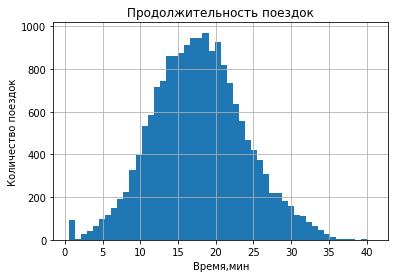

In [ ]:
#построим гистограмму
plt.hist(rides_go['duration'], bins = 50)
plt.title('Продолжительность поездок')
plt.xlabel('Время,мин')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

In [ ]:
#посмотрим сколько поездок было меньше минуты
rides_go.query('duration < 1').count()

user_id     95
distance    95
duration    95
date        95
month       95
dtype: int64

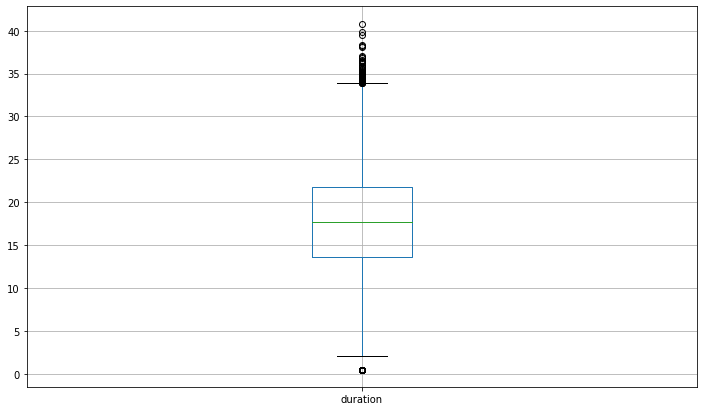

In [ ]:
#построим диаграмму размаха
rides_go.boxplot(column='duration', figsize=(12, 7));

In [ ]:
#посомтрим какие значения мы можем считать выбросами
#рассчитаем точное значение верхнего  и нижне уса диаграммы размаха
qr1 = rides_go['duration'].quantile(.25) # второй квартиль
qr3 = rides_go['duration'].quantile(.75) # третий квартиль
iqr = qr3 - qr1 #межквартильный размах

qr_low = round((qr1 - 1.5 * iqr),2)
qr_high = round((qr3 + 1.5 * iqr),2)

print('Выбросы минимального значения длительности поездки в минутах - ',qr_low)
print('Выбросы максимального значения длительности поездки в минутах - ',qr_high)


Выбросы минимального значения длительности поездки в минутах -  1.41
Выбросы максимального значения длительности поездки в минутах -  33.92


In [ ]:
print('Количество поездок за пределами минимально нормального расстояния - ',
      rides_go.query('duration < 1.41').value_counts().sum())
print('Количество поездок за пределами максимально нормального расстояния - ',
      rides_go.query('duration > 33.92').value_counts().sum())

Количество поездок за пределами минимально нормального расстояния -  95
Количество поездок за пределами максимально нормального расстояния -  82


По гистограмме видим, что в целом данные распределены нормально,но есть небольшая аномалия (менее 100 поездок, примерно 1%) с пракически нулевой продолжительностью поездки
Большинство пользователей используют арендованные самокаты в интервале от 13 до 22 минут.

***Обобщенный вывод по исследовательскому анализу данных:***

**Частота встречаемости городов**

В датафрейме представленны данные по пользователям из 9ти городов.
Распределение  пользователей по городам примерно одинаковое. \
Больше всего пользователей в Пятигорске - 219 человек, меньше всего в Москве - 168 человек.\
Возможно эта небольшая разница связанна с погодными условиями или размером городаю

**Соотношение пользователей с подпиской и без подписки**

Разница между пользователями с подпиской `free` и`ultra` - 9% (835 чел.(54.43%) и 699 чел.(45.57%), соответсвенно)

**Возраст пользователей**

в целом, чаще пользуются арендой самоката пользователи от 18 до 31 года
Пользователей от 13 до 18 лет ~ 5%, старше 31-го года ~ 8 %


**Расстояние, которое пользователь преодолел за одну поездку**
В основном пользователи проезжают от 2.5 км до 4 км.
Самая короткая поездка  - 0.86 км, а самая продолжительная поездка - 7.2 км
Были проверены аномальные начения минимальной и максимальной дистанции


**Продолжительность поездок**
Продолжительность поездок нормально распределена от 0 до 41 минуты. Продолжительностьв интервале 13 - 22 минуты является наиболее часто встречающейся.\
Наблюдаемые выброс поездки в пол минуты выглядят странно, возможно пользователи просто передумали пользоваться самокатом. Либо же техническая неинсправность самого самоката.
Самая длинная поездка заняла 40 минут.

Посокольку аномально короткие поездки подкрепляются аномально коротким временем использования самоката,оставим эти данные.Причиной такого поведения пользователей может быть масса причин(например пользователь передумал, или хотел попробовать воспользоваться но что то не понравилось или не получилось, а моет самокат оказался не исправным)

# Шаг 4. Объединение данных

***4.1 Объединение данных о пользователях, поездках и подписках в один датафрейм***

In [ ]:
#проверим размер датасетов до объединения
print('Количество строк с поездками пользователей в "rides_go":', rides_go['user_id'].count())
print('Количество строк c уникальными пользователями в "users_go":', len(users_go['user_id']))


Количество строк с поездками пользователей в "rides_go": 18068
Количество строк c уникальными пользователями в "users_go": 1534


In [ ]:
#создадим общий датафрейм 'total_go'
total_go = users_go.merge(rides_go, on='user_id').merge(subscriptions_go, on='subscription_type')
total_go.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [ ]:
#проверим количество строк в новом датафрейме total_go после объединения
print('Количество строк с поездками в "total_go":', total_go['user_id'].count())
print('Количество уникальных пользователей в "total_go":', len(total_go['user_id'].unique()))

Количество строк с поездками в "total_go": 18068
Количество уникальных пользователей в "total_go": 1534


<div class="alert alert-info"> <b>Комментарии студента:</b>
Количество строк в датафрейме с поездками  до объединения совпадает с количеством строк  в объединенном датафрейме `total_go`. Количество уникальных пользователей также совпадает. </div>

In [ ]:
total_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


***4.2 Создаем еще два датафрейма из датафрейма в п.4.1.***

создадим датафрейм `total_go_free` для пользователей без подписки

In [ ]:
total_go_free = total_go.query('subscription_type == "free"')
total_go_free.sample(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
15759,1374,Марк,29,Пятигорск,free,4719.548421,14.311865,2021-02-23,2,8,50,0
11390,1057,Адель,26,Москва,free,2109.734207,19.507641,2021-06-27,6,8,50,0
16752,1439,Василина,23,Ростов-на-Дону,free,3007.697078,17.615401,2021-10-08,10,8,50,0
9723,939,Василина,31,Сочи,free,2498.545647,23.531749,2021-09-18,9,8,50,0
9619,931,Дамир,34,Москва,free,2612.608021,7.805796,2021-06-02,6,8,50,0


создадим датафрейм `total_go_ultra` для пользователей с подпиской

In [ ]:
total_go_ultra = total_go.query('subscription_type == "ultra"')
total_go_ultra.sample(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
5337,572,Станислав,24,Екатеринбург,ultra,3720.571844,10.972654,2021-12-23,12,6,0,199
2339,249,Лариса,32,Сочи,ultra,2647.687744,15.354451,2021-06-27,6,6,0,199
642,70,Вера,32,Омск,ultra,4206.640460,25.826562,2021-03-04,3,6,0,199
5086,547,Юрий,26,Тюмень,ultra,3196.732322,22.700281,2021-10-05,10,6,0,199
6373,684,Эвелина,27,Краснодар,ultra,3531.683822,24.152686,2021-12-10,12,6,0,199


***4.3 Визиализация информации  о расстоянии и времени поездок для пользователей обеих категорий***

Рассмотрим данные о пользователях без подписки

In [ ]:
total_go_free.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.495282,17.390909,6.522994,8.0,50.0,0.0
std,241.165628,4.481100,1246.173806,6.326803,3.449770,0.0,0.0,0.0
min,700.000000,12.000000,0.855683,0.500000,1.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2366.562689,12.958437,4.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3114.648465,17.326890,7.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3905.697894,21.594071,9.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.007745,34.948498,12.000000,8.0,50.0,0.0


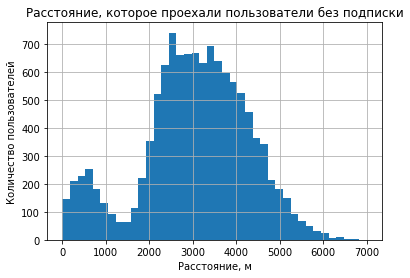

<Figure size 864x504 with 0 Axes>

In [ ]:
#визуализируем информацию о расстоянии для пользователей без подписки

plt.hist(total_go_free['distance'], bins=40, range = (0, 7000))
plt.title('Расстояние, которое проехали пользователи без подписки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.grid( True )
plt.figure(figsize=(12,7))
plt.show()

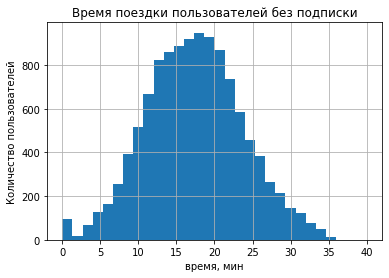

<Figure size 864x504 with 0 Axes>

In [ ]:
#визуализируем информацию о времени для пользователей без подписки
plt.hist(total_go_free['duration'], bins=30, range = (0, 40))
plt.title('Время поездки пользователей без подписки')
plt.xlabel('время, мин')
plt.ylabel('Количество пользователей')
plt.grid( True )
plt.figure(figsize=(12,7))
plt.show();

Рассмотрим данные о пользователях  с подпиской `ultra`

In [ ]:
total_go_ultra.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.445388,18.541985,6.422308,6.0,0.0,199.0
std,201.099339,4.757208,836.895330,5.572048,3.414616,0.0,0.0,0.0
min,1.000000,12.000000,244.210438,3.760353,1.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.444017,14.524654,4.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3148.637229,18.178153,6.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3560.574425,21.884129,9.000000,6.0,0.0,199.0
max,699.000000,38.000000,5699.769662,40.823963,12.000000,6.0,0.0,199.0


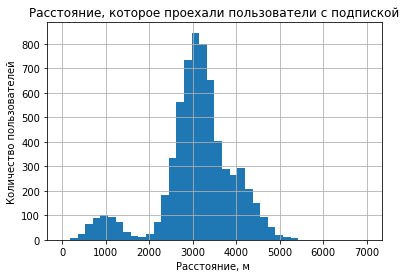

<Figure size 864x504 with 0 Axes>

In [ ]:
#виализируем информацию о времени для пользователей с подпиской
plt.hist(total_go_ultra['distance'], bins=40, range = (0, 7000))
plt.title('Расстояние, которое проехали пользователи c подпиской')
plt.xlabel('Расстояние, м ')
plt.ylabel('Количество пользователей')
plt.grid( True )
plt.figure(figsize=(12,7))
plt.show();

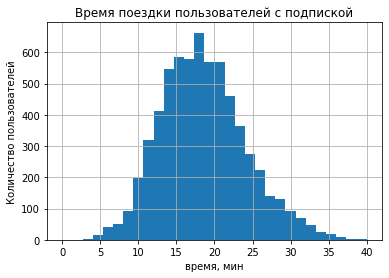

<Figure size 864x504 with 0 Axes>

In [ ]:
#визуализируем информацию о временидля пользователей с подпиской
plt.hist(total_go_ultra['duration'], bins=30, range = (0, 40))
plt.title('Время поездки пользователей с подпиской')
plt.xlabel('время, мин')
plt.ylabel('Количество пользователей')
plt.grid( True )
plt.figure(figsize=(12,7))
plt.show();

**Вывод** \
    Рассмотрев визулизацию данных по расстоянию и времени поездки для двух тарифов ожно сказать:\
    * пользователи, которые используют самокат без подписки чаще всего проезжают  от 2 до 4.1 км  и используют самокат от 10 до 25 минут\
    * пользоватили с тарифом `ultra`чаще всего проезжают от 2.6 до 3.7 км и используют самокат от 12 до 23 минут\
    \
    Также, можем сказать, что дистанция пользователей без подписки более разнообрана и гораздо чаще встречаются поездки дальностью до 6км
        
    

# Шаг 5. Подсчёт выручки

***5.1 Создание датафрейма с  агрегированными даннми о поездках на основе датафрейма `total_go`*** \
Найти суммарное время для каждого пользователя за каждый месяц

In [ ]:
#округлим значения времени поездки с помощью метода np.ceil библиотеки numpy
total_go['duration'] = np.ceil(total_go['duration'])
total_go.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [ ]:
#создадим новый датафрейм с агрегированными данными
total_go_2= total_go.pivot_table(index=['user_id', 'month'],values = ['name','distance', 'duration', 'subscription_type'],
                                 aggfunc={'distance':'sum', 'duration':'sum','name':'count', 'subscription_type': 'min'})
total_go_2.columns = ['total_distance', 'total_duration','count_trip', 'subscription_type']

In [ ]:
total_go_2

total_distance  total_duration  count_trip subscription_type
user_id month                                                              
1       1         7027.511294            42.0           2             ultra
        4          754.159807             7.0           1             ultra
        8         6723.470560            46.0           2             ultra
        10        5809.911100            32.0           2             ultra
        11        7003.499363            56.0           3             ultra
...                       ...             ...         ...               ...
1534    6         3409.468534            26.0           2              free
        8         7622.453034            48.0           2              free
        9         4928.173852            23.0           1              free
        11       13350.015305            78.0           4              free
        12        2371.711192            16.0           1              free

[11331 rows x 4 columns]

In [ ]:
#проверим сводную таблицу на пропуски
total_go_2.isnull().sum()

total_distance       0
total_duration       0
count_trip           0
subscription_type    0
dtype: int64

Создали новый датафрейм `total_go_2` с агрегированными данными о пользователях по месяцам. Пропусков в новом датафрейме не обнаружено.

<div class="alert alert-info"> <b>Комментарии студента:</b>Учла комментарий, проверила пропуски</div>


***5.2 В новый датафрейм добавить столбец с помесячной выручкой,которую принес каждый пользователь***
* продолжительность поездки округляем  до целого числа в большую сторону.

In [ ]:
#вспомним условия тарифов
subscriptions_go

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [ ]:
#напишем функцию для расчета выручки, зная стоимость тарифов
def revenue_month(row):
    if row['subscription_type']== 'ultra':
        return 6 * row['total_duration'] + 199
    if row['subscription_type']== 'free':
        return 50 * row['count_trip'] + 8 * row['total_duration']

In [ ]:
#добавим в датафрейм новый столбец 'revenue' используя функцию
total_go_2['revenue']= total_go_2.apply(revenue_month, axis=1)

In [ ]:
#посмотрим первые 10 строк
total_go_2.head(10)

total_distance  total_duration  count_trip subscription_type  \
user_id month                                                                 
1       1         7027.511294            42.0           2             ultra   
        4          754.159807             7.0           1             ultra   
        8         6723.470560            46.0           2             ultra   
        10        5809.911100            32.0           2             ultra   
        11        7003.499363            56.0           3             ultra   
        12        6751.629942            28.0           2             ultra   
2       3        10187.723006            63.0           3             ultra   
        4         6164.381824            40.0           2             ultra   
        6         3255.338202            14.0           1             ultra   
        7         6780.722964            48.0           2             ultra   

               revenue  
user_id month           
1       1        451.0  
        4        241.0  
        8        475.0  
        10       391.0  
        11       535.0  
        12       367.0  
2       3        577.0  
        4        439.0  
        6        283.0  
        7        487.0

**Вывод:**\
Был создан новый датафрейм в котором посчитали помесячно: общую дистанцию(`total_distance`), сумарное время каждого пользователя(`total_duration`), количество поездок и выручку,  которую принес каждый пользователь (`revenue`)

# Шаг 6. Проверка гипотез
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

**6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.**

Проверим гипотезу: **пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе.**

Обозначим нулевую и альтернативную гипотезы:

Нулевая гипотеза (H0)\
Продолжительность поездки с подпиской `ultra` = продолжительности поездки без подписки `free`\
Альтернативная гипотеза (Н1)\
Продолжительность поездки с подпиской `ultra` > продолжительности поездки без подписки `free`\
\
уровень статистичской значимости(alpha) будет равен 5%

In [ ]:
#продолжительность поездки пользователей с подпиской
ultra = total_go_ultra['duration']
#продолжительность поездки пользователей без подписки
free = total_go_free['duration']


alpha= 0.05

#проведем ttest для двух выборок
results = st.ttest_ind(ultra,free,alternative = 'greater')
print('p-value:', results.pvalue)

if results.pvalue < alpha:
      print ('Отвергаем нулевую гипотезу')
else:
      print('Нет оснований отвергнуть нулевую гипотезу')


p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод:**\
Отвергаем нулевую гипотезу, есть основание говорить, что **пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе**

**6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? \
Проверьте гипотезу и сделайте выводы.**

Проверим гипотезу: **пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.**

Обозначим нулевую и альтернативную гипотезы: \
H0 -Среднее расстояние, которое проезжают пользователи с подпиской `ultra` = 3130м \
Н1 -Среднее расстояние, которое проезжают пользователи с подпиской `ultra` > 3130м  

уровень статистичской значимости(alpha) будет равен 5%

In [ ]:
#расстояние которое проезжают пользователей с подпиской
ultra = total_go_ultra['distance']

#оптимальное расстояние для поездки на самокате
interested_value = 3130

alpha= 0.05

#проведем односторонний тест
results = st.ttest_1samp(ultra, interested_value,alternative='greater')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: расстояние одной поездки с подпиской ultra превышает в 3130 м ')
else:
    print('Не получилось отвергнуть нулевую гипотезу')



p-value: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод:**\
Не удалось отвергнуть гипотезу о том, что среднее расстояние ,которое проезжают пользователи с подпиской `ultra` (меньше или) равно 3130 метров.

**6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.**

Гипотеза: **помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки**

Обозначим нулевую и альтернативную гипотезы: \
H0 - Выручка пользователей пользователи с подпиской `ultra` = выручки пользователей без подписки(`free`) \
Н1 - Выручка пользователей пользователи с подпиской `ultra` > выручки пользователей без подписки(`free`)

уровень статистичской значимости(alpha) будет равен 5%

In [ ]:
#помесячная выручка с подпиской ultra
ultra_per_month = total_go_2.loc[total_go_2.subscription_type =='ultra', 'revenue']
#помесячная выручка без подписки
free_per_month = total_go_2.loc[total_go_2.subscription_type =='free', 'revenue']

alpha= 0.05

results = st.ttest_ind(ultra_per_month,free_per_month,alternative = 'greater')
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод:** \
Нулевая гипотеза о равенстве выручки отвергается, есть основание говорить, что выручка с пользователей на подписке `ultra` превышает выручку пользователей без подписки `free`

**6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

Можно воспользоваться тестом на сравнение средних значений для зависимых (парных) выборок. \
В данном случае, каждая группа будет представлена данными об обращениях до и после обновления серверов для каждого пользователя.

Гипотезы будут сформулированаследующим образом:\
H0: μ1 = μ2 \
H1: μ1 != μ2 \
где μ1 и μ2 - средние значения до и после изменений.

Для проверки данной гипотезы используется метод:
`scipy.stats.ttest_rel()`

# Общий вывод:

Основные цели проекта можно считать - достигнуты.

В данным проекте были загружены три датафрейма с данными о пользователях, совершенных ими поездках и информацией о подписках.

**1)** Данные были изучены и проверены на пропуски(их нет),соответствия типам данных(заметили тип данныз в столбце `data`) и дубликаты(были найдены явные дубликаты, удалили 31 строку)


**2)** Был проведен исследовательский анализ данных на основании которого можно сказать:

   • Пользователи распределены по города примерно одинаково.Больше всего пользователей из Пятигорсска (219чел), меньше всего из Москвы(168 чел). \
   • Пользователей без подписки больше пользователей с подпиской `ultra` на ~9% \
   • Средний возраст пользователей от 21 до 28 лет\
   • Среднее расстояние, которое проезжают пользователи от 2.5 км до 4 км  \
   • Длительность поездки в среднем составляет ~ 13 - 22 мин


**3)** Объединили все данные о пользователях, тарифах и поездках в один датафрей `total_go`.
На его основе были созданы новые датафремы (`total_go_free` b `total_go_ultra`) в которых мы объединили пользователей без подписк (`free`) и пользователей с подпиской(`ultra`).


**4)** Сделали визуализуцию данных для пользователей каждого тарифа, на основании которых можносказать седующее:

   •  пользователи, которые используют самокат без подписки чаще всего проезжают от 2 до 4.1 км и используют самокат от 10 до 25 минут
   
   • пользоватили с тарифом `ultra` чаще всего проезжают от 2.6 до 3.7 км и используют самокат от 12 до 23 минут

**5)** Посчитали помесячно выручку для каждого пользователя

**6)** Были выдвинуты и проверены три гипотезы:\
   • пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе. \
   • пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.\
   • помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
В кажой гипотезе были сформулировваны нульвая  и альтернативная гипозы

Подтвердились 2 гипотезы:
* о том, что пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
* о том, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

При проверке гипотезы  - *пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку* - не удалось отвергнуть нулевую гипотезу "Среднее расстояние, которое проезжают пользователи с подпиской ultra = 3130м"

   
**В качестве рекомендации для развития бизнеса сервиса по аренде самокатов `GoFast`  могу предложить следующие:** \
1. Расширение географии городов. Исследование данных о пользователях из разных городов показало, что не зависмо от плотности населения люди пользуются арендой самокатов

2. Используя данные о средней длительности поездки, можно оптимизировать процесс аренды и возврата самокатов, улучшить доступность самокатов в популярных местах, а также предложить бонусы или скидки для пользователей, совершающих длительные поездки.

3. Расширение тарифных планов. Исходя из анализа пользователей с подпиской и без нее, можно предложить новые тарифные планы или дополнительные услуги, которые могли бы привлечь больше клиентов. Например, предложение семейных тарифов, скидок для постоянных клиентов или реферальной программы за привлечение новых пользователей. \

Эти рекомендации могут помочь сервису по аренде самокатов улучшить пользовательский опыт, привлечь новых клиентов и увеличить выручку.

# Шаг 7. Распределения (дополнительное задание)

**7.1** Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку.

То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. \
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают
10 % пользователей. \
Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %.

Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Необходимо разослать 884 промокодов


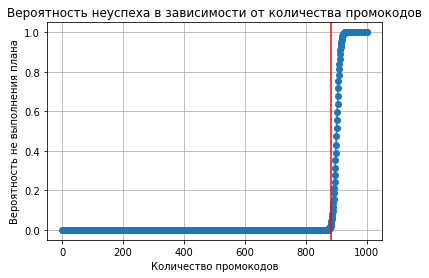

In [ ]:
# Количество клиентов, которым нужно продлить подписку
n = 1000
# Вероятность успешного продления подписки
p = 0.1
# Заданная вероятность неуспеха
alpha = 0.05

x = np.arange(1, n+1)
failure_prob = st.binom.cdf(x-1, n, 1 - p)

# Находим количество промокодов для выполнения плана
result = np.argmax(failure_prob >= alpha)

print(f'Необходимо разослать {result} промокодов')

plt.plot(x, failure_prob,marker='o')
plt.axvline(x=result, color='red')
plt.xlabel('Количество промокодов')
plt.ylabel('Вероятность не выполнения плана')
plt.title('Вероятность неуспеха в зависимости от количества промокодов')
plt.grid(True)
plt.show()


In [ ]:
# Вариант с вычисленим неудач.
from scipy.stats import binom
import numpy as np

p = 0.1
n = 800

# Начать можно с ~900.
for n in range(800, 1800):
    if binom.cdf(99, n, p) <= 0.05:
      print("Минимальное количество промокодов: ", n)
      break


Минимальное количество промокодов:  1161


**7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.**

Вероятность того, что не более 399.5 тыс. клиентов откроют уведомления: 0.15371708296369768


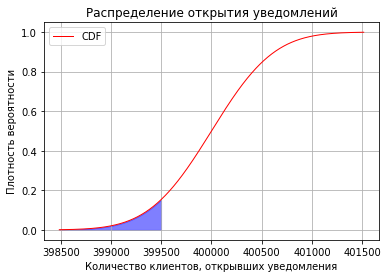

In [ ]:

# Параметры задачи
n = 1000000
p = 0.4
# Расчет параметров нормального распределения(mu-математическое ожидание,sigma-стандартное отклонение)
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Аппроксимация с помощью нормального распределения
distr = st.norm(mu, sigma)


x = 399500
# Вероятность того, что не более 399.5 тыс. клиентов откроют уведомления
result = distr.cdf(x)
print('Вероятность того, что не более 399.5 тыс. клиентов откроют уведомления:', result)

# График плотности вероятности
x = np.linspace(distr.ppf(0.001), distr.ppf(0.999), 1000)
plt.plot(x, distr.cdf(x), 'r-', lw=1, label='CDF')

plt.fill_between(x, 0, distr.cdf(x), where=(x <= 399500), color='blue', alpha=0.5)
plt.xlabel('Количество клиентов, открывших уведомления')
plt.ylabel('Плотность вероятности')
plt.title('Распределение открытия уведомлений')
plt.legend()
plt.grid(True)
plt.show()